In [1]:
##Load and Explore the Dataset (EDA)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv(r'C:\Users\sub\OneDrive\Documents\ToyotaCorolla - MLR.csv', encoding='latin1')

In [9]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [15]:
df = df[['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Cylinders']] 


In [17]:
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Weight  \
0  13500         23  46986    Diesel  90          0  2000      3    1165   
1  13750         23  72937    Diesel  90          0  2000      3    1165   
2  13950         24  41711    Diesel  90          0  2000      3    1165   
3  14950         26  48000    Diesel  90          0  2000      3    1165   
4  13750         30  38500    Diesel  90          0  2000      3    1170   

   Cylinders  
0          4  
1          4  
2          4  
3          4  
4          4  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
 9   Cylinders  1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None


In [21]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors      Weight  Cylinders  
count   1436.00000  1436.000000  1436.00000     1436.0  
mean    1576.85585     4.033426  1072.45961        4.0  
std      424.38677     0.952677    52.64112        0.0  
min     1300.00000     2.000000  1000.00000        4.0  
25%     1400.00000   

In [23]:
##Visualization and Preprocessing

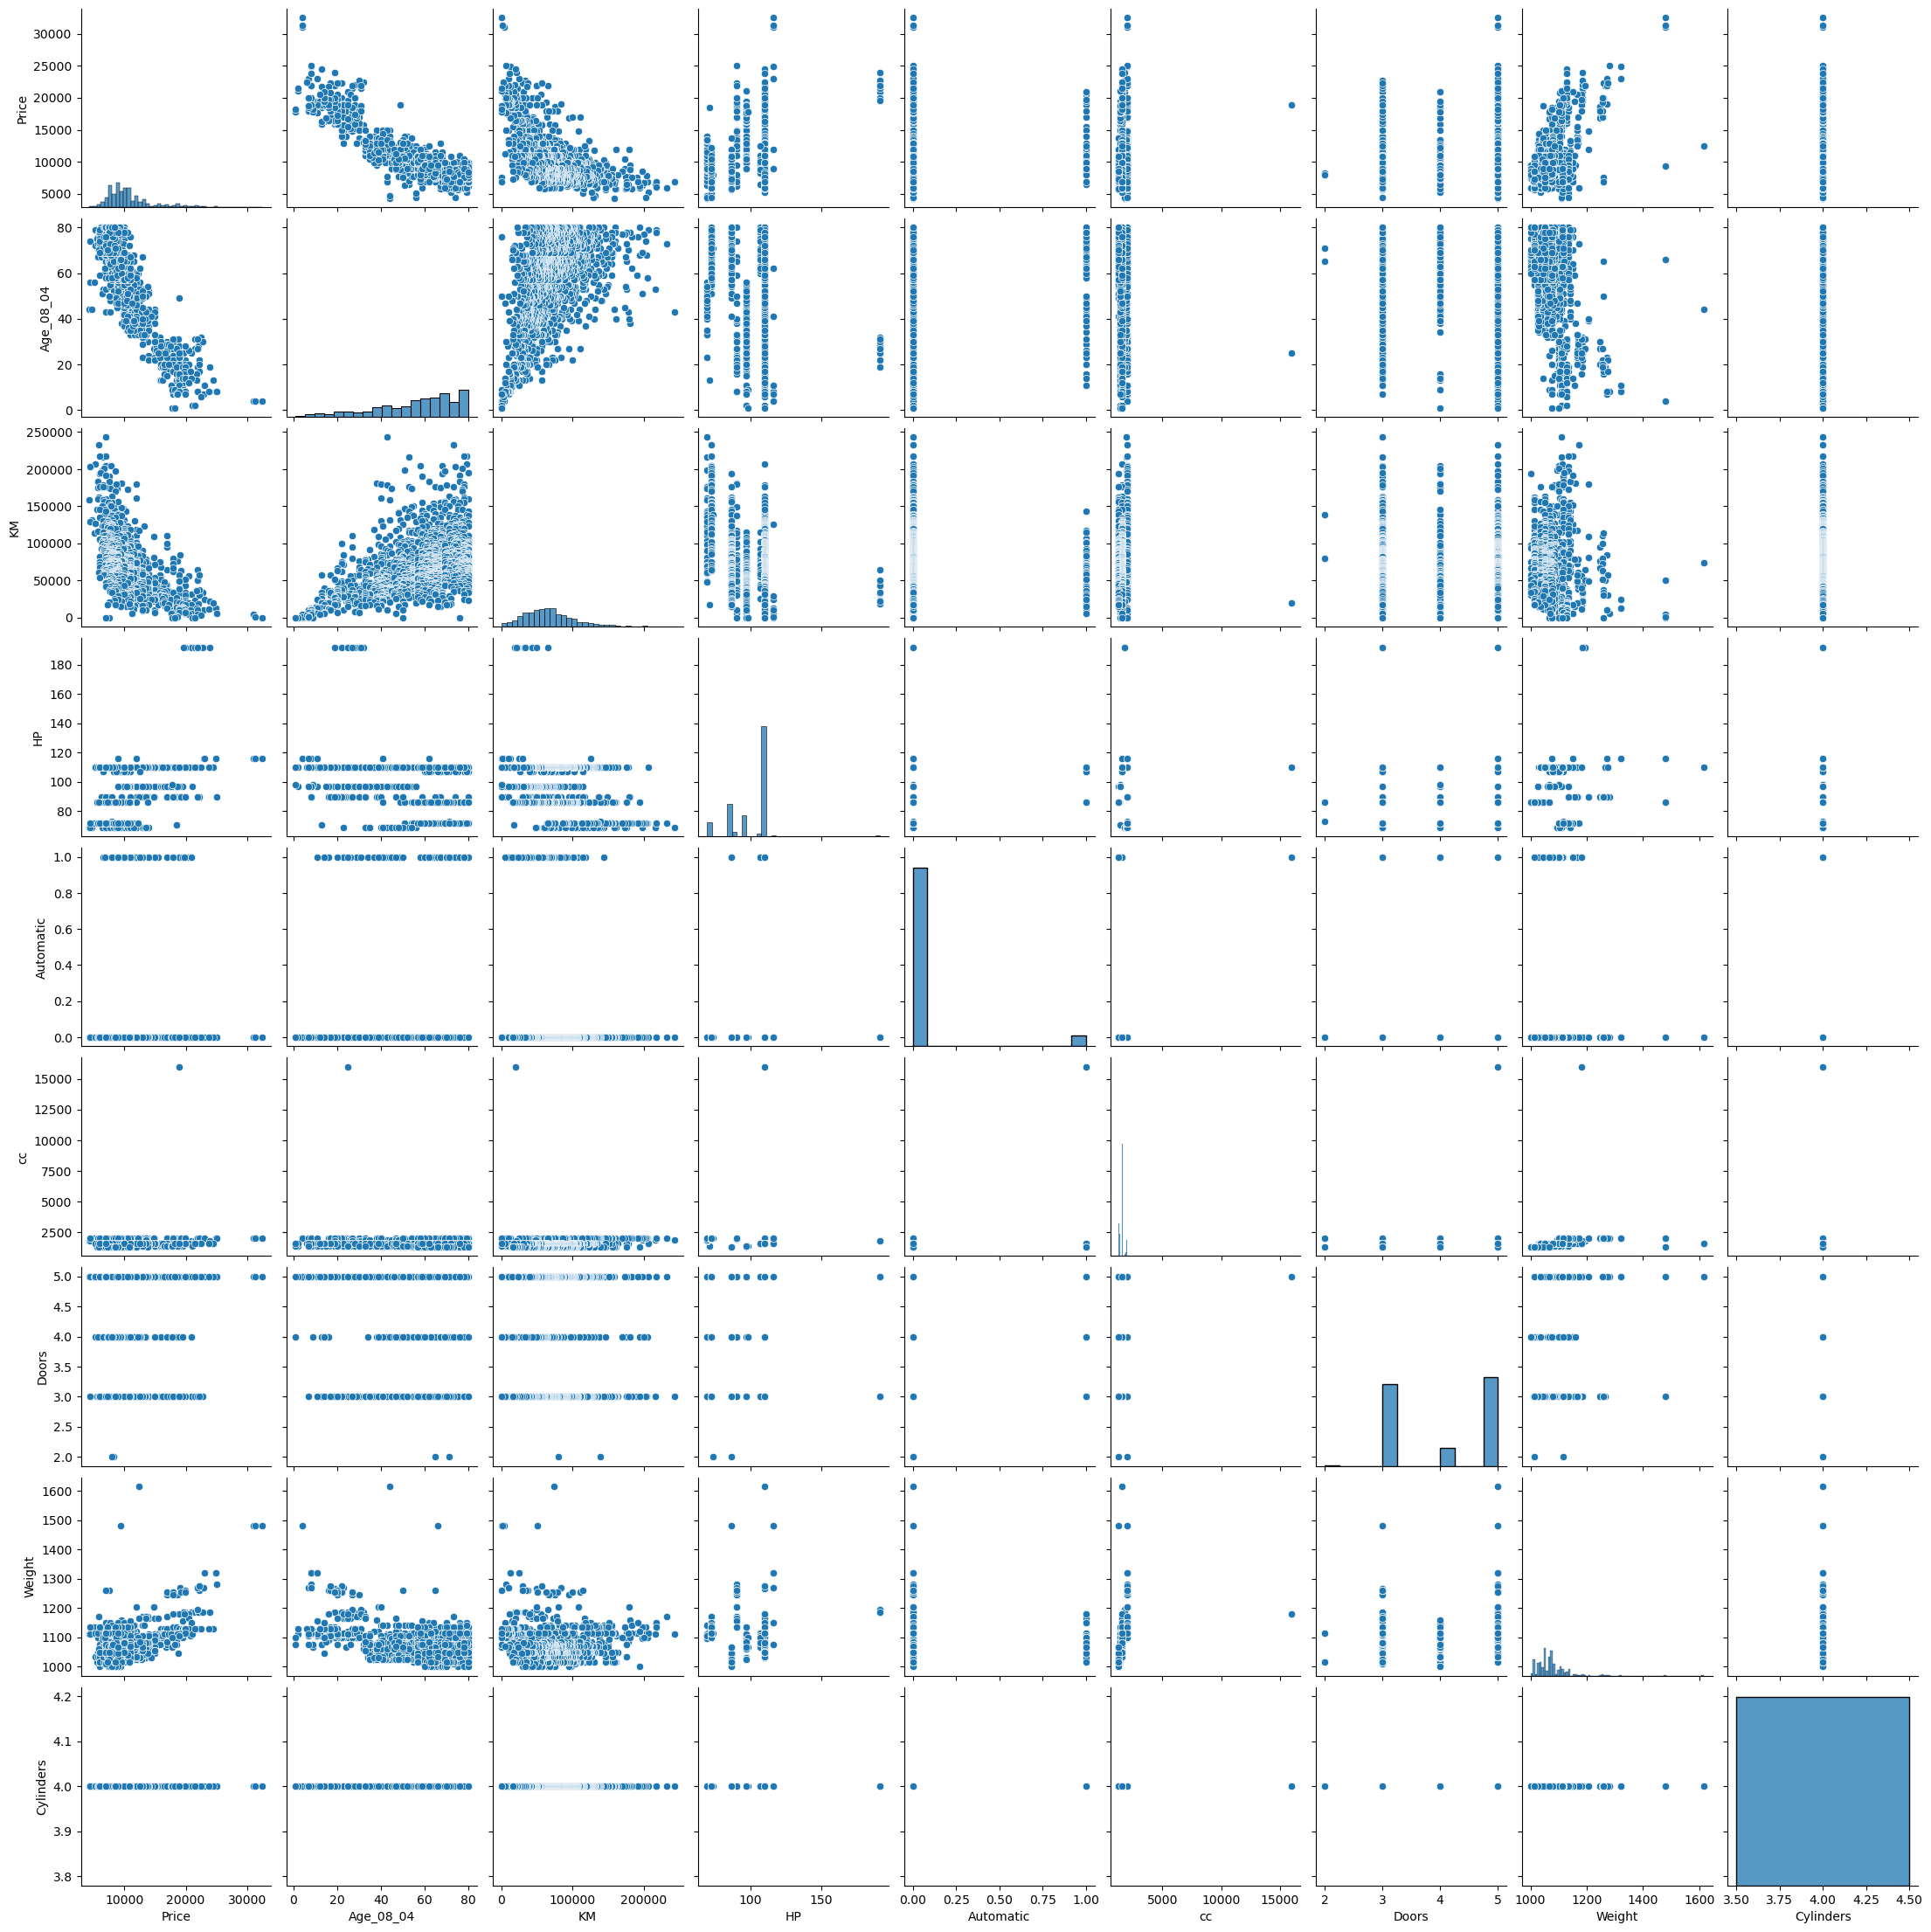

In [28]:
sns.pairplot(df)
plt.show()

In [30]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Weight       0
Cylinders    0
dtype: int64


In [34]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


In [36]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Cylinders,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,1165,4,True,False
1,13750,23,72937,90,0,2000,3,1165,4,True,False
2,13950,24,41711,90,0,2000,3,1165,4,True,False
3,14950,26,48000,90,0,2000,3,1165,4,True,False
4,13750,30,38500,90,0,2000,3,1170,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,1025,4,False,True
1432,10845,72,19000,86,0,1300,3,1015,4,False,True
1433,8500,71,17016,86,0,1300,3,1015,4,False,True
1434,7250,70,16916,86,0,1300,3,1015,4,False,True


In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
X = df.drop('Price', axis=1)

In [42]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Cylinders,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,1165,4,True,False
1,23,72937,90,0,2000,3,1165,4,True,False
2,24,41711,90,0,2000,3,1165,4,True,False
3,26,48000,90,0,2000,3,1165,4,True,False
4,30,38500,90,0,2000,3,1170,4,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,1025,4,False,True
1432,72,19000,86,0,1300,3,1015,4,False,True
1433,71,17016,86,0,1300,3,1015,4,False,True
1434,70,16916,86,0,1300,3,1015,4,False,True


In [44]:
y = df['Price']

In [46]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [48]:
scaler = StandardScaler()

In [50]:
scaler

StandardScaler()

In [52]:
X_scaled = scaler.fit_transform(X)

In [54]:
X_scaled

array([[-1.77196633, -0.57469494, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       [-1.77196633,  0.11745379, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       [-1.71818412, -0.71538641, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, ...,  0.        ,
        -0.34784942,  0.36888474],
       [ 0.75579727, -1.37670303, -1.03513832, ...,  0.        ,
        -0.34784942,  0.36888474],
       [ 1.0784905 , -1.82784925,  0.5674405 , ...,  0.        ,
        -0.34784942,  0.36888474]])

In [56]:
##Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(288, 10)
(1148,)
(288,)


In [64]:
##Build 3 MLR Models


In [66]:
##All features
from sklearn.linear_model import LinearRegression

In [68]:
model1 = LinearRegression()

In [70]:
model1.fit(X_train, y_train)

LinearRegression()

In [72]:
coefficients = pd.Series(model1.coef_, index=X.columns)
print("Model 1 Coefficients:\n", coefficients)

Model 1 Coefficients:
 Age_08_04          -2246.525221
KM                  -597.153995
HP                   236.277377
Automatic             21.349420
cc                   -12.827198
Doors                -80.457469
Weight              1371.833274
Cylinders              0.000000
Fuel_Type_Diesel       1.303927
Fuel_Type_Petrol     472.015713
dtype: float64


In [74]:
##Drop less important features (e.g., CC and Doors)

In [78]:
X2 = df.drop(['Price', 'cc', 'Doors'], axis=1)

In [80]:
X2

,Age_08_04,KM,HP,Automatic,Weight,Cylinders,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,1165,4,True,False
1,23,72937,90,0,1165,4,True,False
2,24,41711,90,0,1165,4,True,False
3,26,48000,90,0,1165,4,True,False
4,30,38500,90,0,1170,4,True,False
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1025,4,False,True
1432,72,19000,86,0,1015,4,False,True
1433,71,17016,86,0,1015,4,False,True
1434,70,16916,86,0,1015,4,False,True


In [82]:
X2_scaled = scaler.fit_transform(X2)

In [84]:
X2_scaled

array([[-1.77196633, -0.57469494, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       [-1.77196633,  0.11745379, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       [-1.71818412, -0.71538641, -0.76804185, ...,  0.        ,
         2.87480715, -2.71087388],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, ...,  0.        ,
        -0.34784942,  0.36888474],
       [ 0.75579727, -1.37670303, -1.03513832, ...,  0.        ,
        -0.34784942,  0.36888474],
       [ 1.0784905 , -1.82784925,  0.5674405 , ...,  0.        ,
        -0.34784942,  0.36888474]])

In [86]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

In [88]:
model2 = LinearRegression()

In [90]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [92]:
print("Model 2 Score:", model2.score(X2_test, y2_test))

Model 2 Score: 0.8347720832929076


In [94]:
##Only top correlated features

In [96]:
correlation = df.corr()
print(correlation['Price'].sort_values(ascending=False))


Price               1.000000
Weight              0.581198
HP                  0.314990
Doors               0.185326
cc                  0.126389
Fuel_Type_Diesel    0.054084
Automatic           0.033081
Fuel_Type_Petrol   -0.038516
KM                 -0.569960
Age_08_04          -0.876590
Cylinders                NaN
Name: Price, dtype: float64


In [102]:
X3 = df[['Age_08_04', 'KM', 'HP', 'Weight']]  
X3_scaled = scaler.fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)

In [104]:
model3 = LinearRegression()

In [106]:
model3.fit(X3_train, y3_train)

LinearRegression()

In [108]:
print("Model 3 Score:", model3.score(X3_test, y3_test))

Model 3 Score: 0.8506068681500834


In [110]:
##Evaluate the Models

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    

In [146]:
print("Model 1 Evaluation:")
evaluate(model1, X_test, y_test)


Model 1 Evaluation:
R2 Score: 0.8332952678447362
MSE: 2224306.040393546


In [148]:
print("Model 2 Evaluation:")
evaluate(model2, X2_test, y2_test)

Model 2 Evaluation:
R2 Score: 0.8347720832929076
MSE: 2204601.203707478


In [150]:
print("Model 3 Evaluation:")
evaluate(model3, X3_test, y3_test)

Model 3 Evaluation:
R2 Score: 0.8506068681500834
MSE: 1993321.0129727353


In [152]:
##Lasso and Ridge Regression

In [154]:
from sklearn.linear_model import Ridge, Lasso

In [156]:
ridge = Ridge(alpha=1.0)

In [158]:
ridge.fit(X_train, y_train)

Ridge()

In [160]:
print("Ridge Evaluation:")

Ridge Evaluation:


In [162]:
evaluate(ridge, X_test, y_test)

R2 Score: 0.8334708246311431
MSE: 2221963.6232624394


In [164]:
lasso = Lasso(alpha=0.1)

In [166]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [168]:
print("Lasso Evaluation:")

Lasso Evaluation:


In [170]:
evaluate(lasso, X_test, y_test)

R2 Score: 0.83329120392866
MSE: 2224360.2643676293


In [ ]:
1. What is Normalization & Standardization and how is it helpful?

Normalization scales data between 0 and 1. Useful when features have different scales.

Standardization transforms data to have mean = 0 and standard deviation = 1. Important for regression and regularization (Ridge/Lasso) to ensure coefficients are comparable.
2. What techniques can be used to address multicollinearity in multiple linear regression?

Drop one of the correlated features

Use PCA (Principal Component Analysis)

Use regularization (Ridge or Lasso)

Variance Inflation Factor (VIF) analysis to detect multicollinearity